In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

drive.mount('/content/gdrive')
root_path1 = 'gdrive/My Drive/MLforphysicist'
root_path2 = 'gdrive/My\ Drive/MLforphysicist'  #change dir to your project folder

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
model_version = "1"
csv_path = root_path1+"/prediction/predicted_model_v"+model_version+".csv"
df = pd.read_csv(csv_path)
df.head()

,Unnamed: 0,filename,xmin,ymin,xmax,ymax,class,Predicted_xmin,Predicted_ymin,Predicted_xmax,Predicted_ymax,Predicted_class,Predicted_score
0,0,RecFile_1_20181011_153137_pointgrey_flycapture...,875,521,893,546,A,804,515,823,545,H,0.388208
1,1,RecFile_1_20190124_111149_pointgrey_flycapture...,807,320,918,370,ID3,813,332,926,370,ID3,0.874966
2,2,RecFile_7_20180111_100948_pointgrey_flycapture...,1411,591,1447,640,A,944,545,1011,635,F,0.737591
3,3,RecFile_1_20190124_112608_pointgrey_flycapture...,1152,1181,1188,1257,C,1154,1182,1190,1259,C,0.920273
4,4,RecFile_7_20171109_114509_pointgrey_flycapture...,711,-77,799,96,C,713,0,796,94,C,0.767611


In [3]:
def binaryClass(df_,c,threshold):
  df = df_.copy()
  for i in range(len(df["class"])):

    if df["class"].iloc[i] == c:
      df["class"].iloc[i] = "1"
    else:
      df["class"].iloc[i] = "0"

      
    if df["Predicted_class"].iloc[i] == c and df["Predicted_score"].iloc[i] > threshold:
      df["Predicted_class"].iloc[i] = "1"
    else:
      df["Predicted_class"].iloc[i] = "0"

  return df

In [15]:
def binaryClassInt(df_,c,threshold):
  df = df_.copy()
  for i in range(len(df["class"])):

    if df["class"].iloc[i] == c:
      df["class"].iloc[i] = 1
    else:
      df["class"].iloc[i] = 0

      
    if df["Predicted_class"].iloc[i] == c and df["Predicted_score"].iloc[i] > threshold:
      df["Predicted_class"].iloc[i] = 1
    else:
      df["Predicted_class"].iloc[i] = 0

  return df

In [4]:
def precision_score(df):
  tn,fp,fn,tp=confusion_matrix(df["class"],df["Predicted_class"]).ravel()
  return tp / (fp + tp)

In [5]:
def recall_score(df):
  tn,fp,fn,tp=confusion_matrix(df["class"],df["Predicted_class"]).ravel()
  return tp / (fn + tp)

In [7]:
print(df["class"].unique())

['A' 'ID3' 'C' 'H' 'F' 'R']


In [6]:
thresh = 0
all_signals = df["class"].unique()
signal_class = all_signals[2]

In [26]:
df_signal_class = binaryClass(df,signal_class,thresh)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [9]:
df_signal_class.head()

,Unnamed: 0,filename,xmin,ymin,xmax,ymax,class,Predicted_xmin,Predicted_ymin,Predicted_xmax,Predicted_ymax,Predicted_class,Predicted_score
0,0,RecFile_1_20181011_153137_pointgrey_flycapture...,875,521,893,546,0,804,515,823,545,0,0.388208
1,1,RecFile_1_20190124_111149_pointgrey_flycapture...,807,320,918,370,0,813,332,926,370,0,0.874966
2,2,RecFile_7_20180111_100948_pointgrey_flycapture...,1411,591,1447,640,0,944,545,1011,635,0,0.737591
3,3,RecFile_1_20190124_112608_pointgrey_flycapture...,1152,1181,1188,1257,1,1154,1182,1190,1259,1,0.920273
4,4,RecFile_7_20171109_114509_pointgrey_flycapture...,711,-77,799,96,1,713,0,796,94,1,0.767611


In [ ]:
precision_score(df_signal_class)

0.8263473053892215

In [ ]:
recall_score(df_signal_class)

0.9324324324324325

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


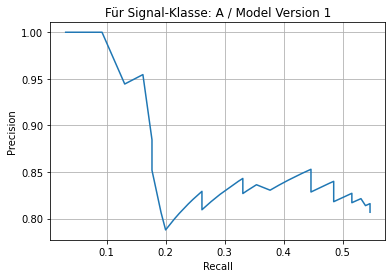

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


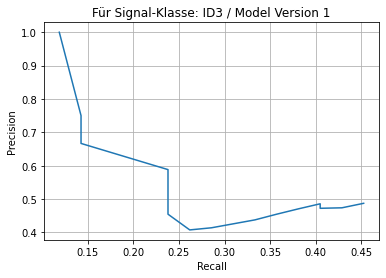

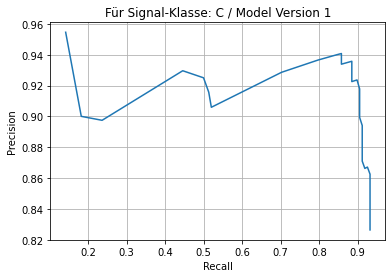

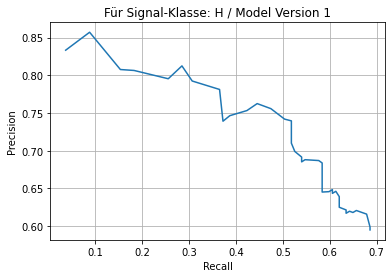

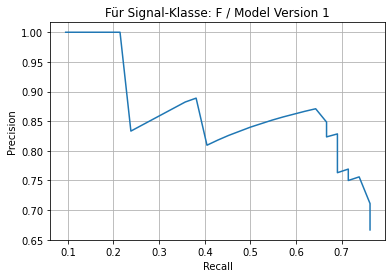

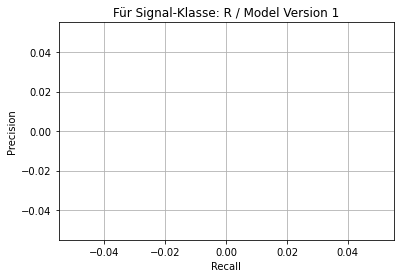

<Figure size 432x288 with 0 Axes>

In [42]:
all_precisions = []
all_recall = []
ap=[]
for s in all_signals:
  p = []
  r = []
  for i in np.arange(0,1,0.02):
    df_signal_class = binaryClass(df,s,i)
    p.append(precision_score(df_signal_class))
    r.append(recall_score(df_signal_class))
  #ap.append(average_precision_score(list(df_signal_class["class"]),list(df_signal_class["Predicted_class"])))
  plt.plot(r,p)
  plt.xlabel("Recall")
  plt.ylabel("Precision")
  plt.title("Für Signal-Klasse: "+s+" / Model Version "+model_version)
  plt.grid()
  plt.show()
  #plt.savefig()
  plt.clf()
  all_precisions.append(p)
  all_recall.append(r)

In [44]:
all_p_interpolated =[]
for p in all_precisions:
  p_interpolated = []
  p.reverse()
  for i,interpolated in enumerate(p):
    if interpolated < max(p[i:]):
      p_interpolated.append(max(p[i:]))
    else:
      p_interpolated.append(interpolated)
  p.reverse()
  p_interpolated.reverse()
  all_p_interpolated.append(p_interpolated)

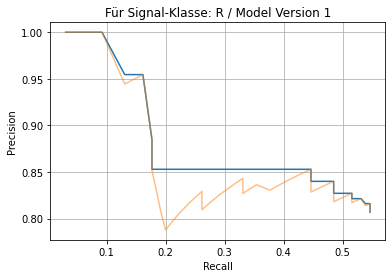

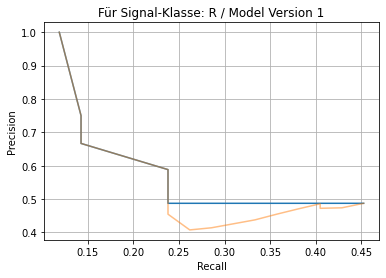

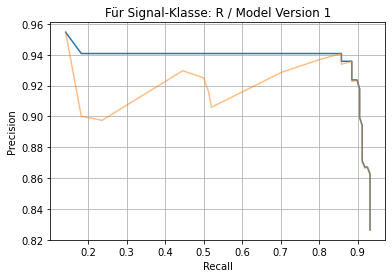

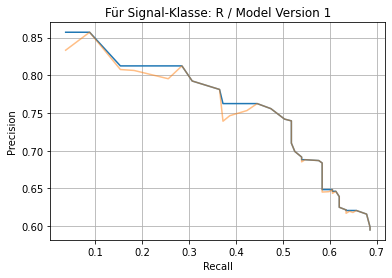

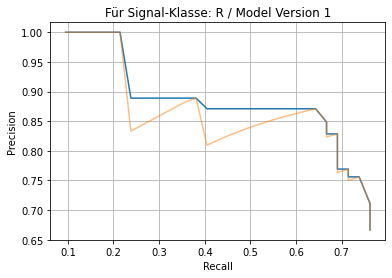

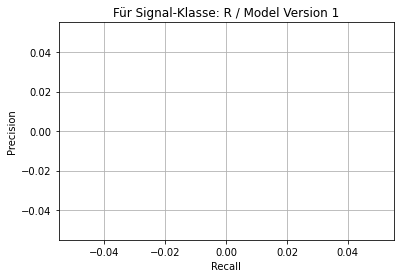

In [47]:
for i in range(len(all_precisions)):
  
  plt.plot(all_recall[i],all_p_interpolated[i])
  plt.plot(all_recall[i],all_precisions[i],alpha=0.5)
  plt.xlabel("Recall")
  plt.ylabel("Precision")
  plt.title("Für Signal-Klasse: "+s+" / Model Version "+model_version)
  plt.grid()
  plt.show()

In [ ]:
a = np.arange(0,1,0.02)
a_file = open(root_path1+"/PrecisionRecall_model_v"+model_version+".txt", "w")
a_file.write("#precision, recall, threshold\n")
for i in range(len(all_precisions)):
  a_file.write("#Class: "+all_signals[i]+"\n")
  for j in range(len(all_precisions[i])):
    a_file.write(str(all_precisions[i][j]))
    a_file.write(',')
    a_file.write(str(all_recall[i][j]))
    a_file.write(',')
    a_file.write(str(a[j]))
    a_file.write("\n")

a_file.close()

In [ ]:
ls gdrive/My\ Drive/MLforphysicist/prediction/

predicted_model_v1.csv  saved01.csv


In [24]:
df_ = binaryClassInt(df,signal_class,thresh)
from sklearn.metrics import average_precision_score
average_precision_score(list(df_["class"]),list(df_["Predicted_class"]))

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0.7905130279980579